In [7]:
import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from networkx.algorithms.community.kclique import k_clique_communities
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt

In [8]:
f = open("./data/SocialMedia.txt")
lines = f.readlines()
fw = open("./data/consolidated.txt","w")
for i in lines:
    line = i.rstrip('\n')
    s = line.split(' ')
    to_write = s[1]+" "+s[2]+"\n"
    if(s[3]=='1' or s[4]=='1'or s[5]=='1' or s[6]=='1'):
        fw.write(to_write)

In [9]:
G = nx.read_edgelist('./data/consolidated.txt')

In [10]:
current=list()
communities=[[] for i in range(5)]
i=0
with open('./data/out_K5.txt') as f:
    for line in f:
        line=line.strip()
        if len(line)==0:
            continue
        if 'Node: ' in line:
            node_no=int(line.split()[1])
            current=list()
            i=0
        else:
            i+=1
            current.append(float(line))
            if i==5:
                communities[current.index(max(current))].append(node_no)
print(communities)

[[6, 12, 19, 29, 47, 78, 81, 102, 105, 114, 123, 124, 127, 128, 139, 143, 144, 155, 156, 157, 165, 174, 188, 198, 199, 200, 202, 205, 229, 242, 256, 258, 262, 269, 271, 274, 288, 290, 298], [13, 24, 27, 30, 32, 54, 58, 66, 69, 74, 77, 79, 80, 88, 91, 95, 97, 100, 104, 110, 112, 113, 115, 116, 126, 132, 137, 147, 151, 153, 159, 160, 164, 166, 172, 186, 195, 203, 208, 218, 222, 231, 232, 236, 239, 248, 257, 260, 264, 276, 278, 282, 283], [1, 2, 11, 15, 16, 17, 18, 20, 21, 25, 26, 33, 35, 36, 38, 39, 41, 49, 55, 62, 67, 70, 73, 76, 82, 85, 90, 92, 101, 107, 108, 109, 111, 117, 118, 120, 121, 122, 131, 133, 136, 141, 149, 150, 152, 154, 161, 162, 163, 168, 176, 180, 182, 183, 191, 196, 201, 204, 209, 216, 217, 219, 223, 226, 230, 238, 243, 249, 261, 266, 275, 280, 281, 293, 295, 296, 297, 299], [4, 5, 7, 10, 14, 22, 28, 31, 34, 37, 42, 44, 45, 46, 48, 52, 53, 59, 61, 63, 65, 68, 72, 75, 83, 84, 87, 93, 94, 96, 98, 103, 106, 129, 130, 134, 138, 140, 142, 146, 169, 170, 171, 173, 175, 178, 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


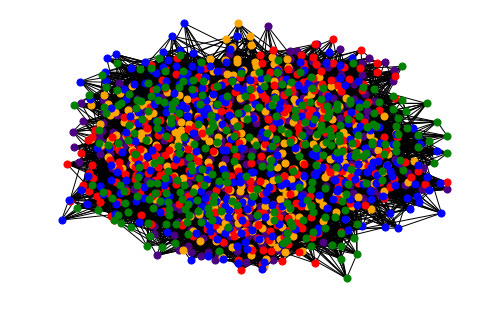

In [11]:
pos = nx.spring_layout(G)
colors = ["indigo", "orange", "red", "blue", "green"]
for i in range(len(communities)):
    graph = communities[i]
    nx.draw(G, node_color=colors[i%5], node_size=50)